               ResNet (DNN) Example for Fashion MNIST Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
# Flatten images
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)


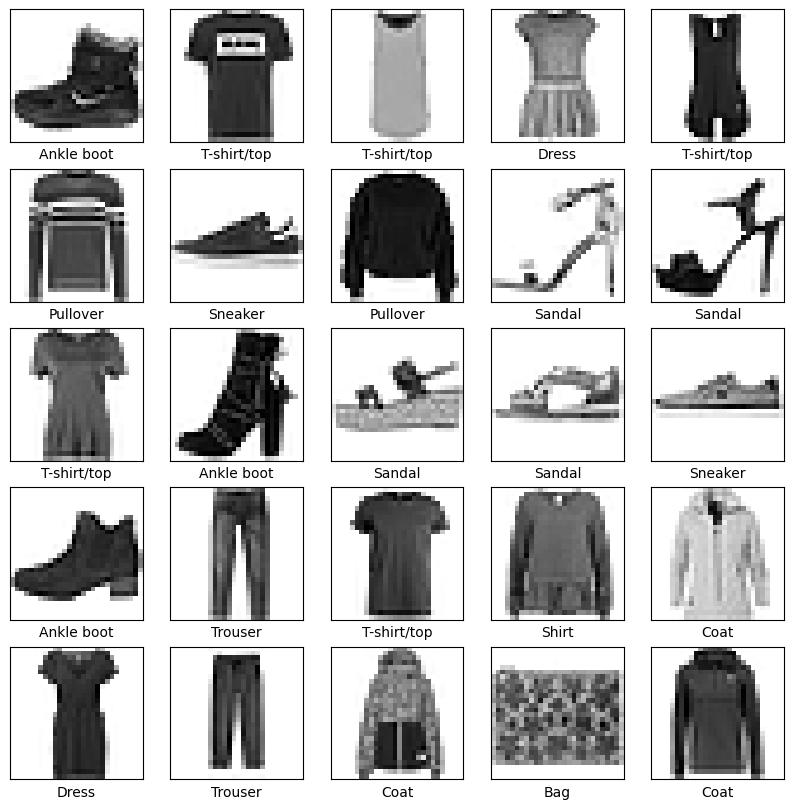

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [5]:
def residual_block(x, units, dropout_rate=0.3):
    shortcut = x

    x = Dense(units, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(units, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)

    # Match shortcut shape if needed
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Dense(units)(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


In [8]:
def create_deep_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial layer before residuals
    x = Dense(512, kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    # Add 5 residual blocks = 10 hidden layers
    for _ in range(5):
        x = residual_block(x, 512, dropout_rate=0.3)

    # Final dense layer before output
    x = Dense(128, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [9]:
# Create model
model = create_deep_resnet_dnn()


In [10]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss=CategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy']
)


In [11]:
# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)


In [12]:
history = model.fit(
    x_train_flat, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.6812 - loss: 1.0952 - val_accuracy: 0.8523 - val_loss: 0.6609 - learning_rate: 5.0000e-04
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.8389 - loss: 0.6929 - val_accuracy: 0.8625 - val_loss: 0.6341 - learning_rate: 5.0000e-04
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.8585 - loss: 0.6418 - val_accuracy: 0.8658 - val_loss: 0.6022 - learning_rate: 5.0000e-04
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.8698 - loss: 0.6118 - val_accuracy: 0.8809 - val_loss: 0.5805 - learning_rate: 5.0000e-04
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.8751 - loss: 0.5982 - val_accuracy: 0.8779 - val_loss: 0.5841 - learning_rate: 5.0000e-04
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.8837 - loss: 0.5739 - val_accuracy: 0.8802 - val_loss: 0.5841 - learning_rate: 5.0000e-04
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/ste

In [13]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9012 - loss: 0.5467
Test Accuracy: 0.9011


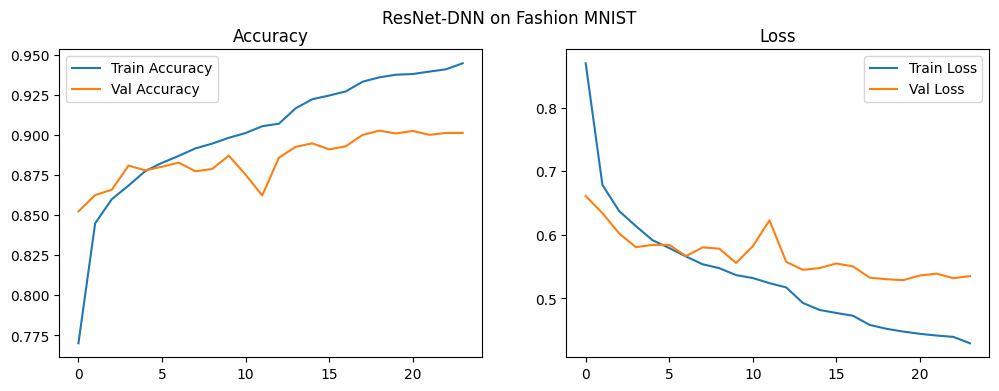

In [14]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

# Plot
plot_history(history, "ResNet-DNN on Fashion MNIST")



Deep ResNet DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


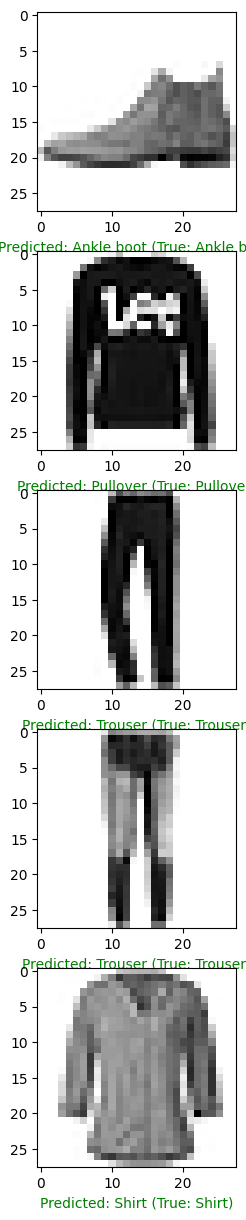

In [15]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nDeep ResNet DNN Predictions:")
plot_predictions(model, x_test_flat, y_test)

